### Data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
KOTAK = pd.read_csv("Database/reliance.csv")

In [3]:
KOTAK.head(10)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,19-May-2022,EQ,"2,484.00","2,512.50","2,466.05","2,538.35","2,477.90","2,479.85","2,494.14","2,856.15","1,930.40",6783641,"16,919,358,308.20",266213
1,18-May-2022,EQ,"2,539.65","2,570.00","2,508.25","2,529.15","2,542.25","2,538.35","2,535.87","2,856.15","1,930.40",7973235,"20,219,114,283.45",293806
2,17-May-2022,EQ,"2,435.10","2,539.90","2,432.00","2,427.20","2,533.50","2,529.15","2,501.03","2,856.15","1,930.40",7638666,"19,104,526,814.40",278980
3,16-May-2022,EQ,"2,434.45","2,481.00","2,416.65","2,426.60","2,428.05","2,427.20","2,444.28","2,856.15","1,930.40",6201594,"15,158,412,714.25",244925
4,13-May-2022,EQ,"2,426.00","2,478.00","2,415.35","2,399.40","2,431.45","2,426.60","2,451.67","2,856.15","1,906.00",8910998,"21,846,799,849.40",408746
5,12-May-2022,EQ,"2,427.50","2,434.85","2,370.00","2,449.30","2,403.50","2,399.40","2,400.60","2,856.15","1,906.00",9456280,"22,700,752,366.95",359540
6,11-May-2022,EQ,"2,472.65","2,484.95","2,421.95","2,474.65","2,450.75","2,449.30","2,454.29","2,856.15","1,906.00",7681157,"18,851,760,949.05",325039
7,10-May-2022,EQ,"2,495.00","2,526.60","2,458.00","2,518.30","2,461.70","2,474.65","2,495.14","2,856.15","1,906.00",9004636,"22,467,846,480.75",329083
8,09-May-2022,EQ,"2,574.95","2,597.10","2,507.00","2,620.65","2,508.00","2,518.30","2,540.75","2,856.15","1,906.00",8345649,"21,204,215,137.35",344258
9,06-May-2022,EQ,"2,612.20","2,659.00","2,593.55","2,640.90","2,628.00","2,620.65","2,619.88","2,856.15","1,906.00",9068448,"23,758,282,132.90",291431


In [4]:
KOTAK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           500 non-null    object
 1   series         500 non-null    object
 2   OPEN           500 non-null    object
 3   HIGH           500 non-null    object
 4   LOW            500 non-null    object
 5   PREV. CLOSE    500 non-null    object
 6   ltp            500 non-null    object
 7   close          500 non-null    object
 8   vwap           500 non-null    object
 9   52W H          500 non-null    object
 10  52W L          500 non-null    object
 11  VOLUME         500 non-null    int64 
 12  VALUE          500 non-null    object
 13  No of trades   500 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 54.8+ KB


In [5]:
KOTAK["Date "] = pd.to_datetime(KOTAK["Date "])
KOTAK["close "] = KOTAK["close "].str.replace(',', '')
KOTAK = KOTAK.astype({"close ": float})

In [6]:
KOTAK.describe()

,close,VOLUME,No of trades
count,500.000000,5.000000e+02,5.000000e+02
mean,2181.372300,1.107555e+07,2.986789e+05
std,278.535489,8.276157e+06,1.606496e+05
min,1408.900000,7.871600e+05,6.328500e+04
25%,1991.525000,5.719194e+06,2.059172e+05
50%,2140.975000,8.597469e+06,2.564875e+05
75%,2398.437500,1.384942e+07,3.419685e+05
max,2819.850000,6.475177e+07,1.428490e+06


Text(0, 0.5, 'Close')

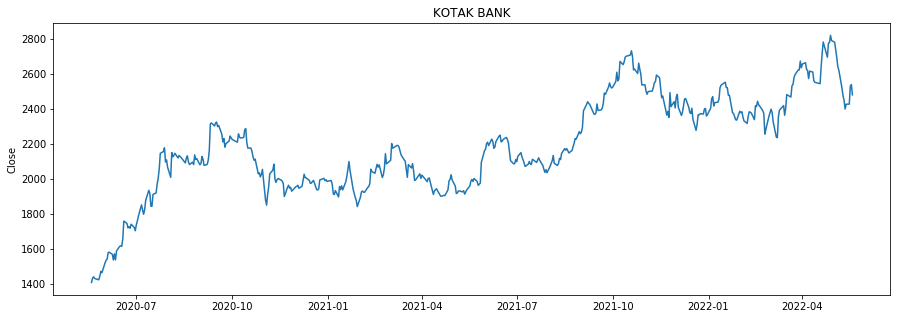

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(KOTAK["Date "], KOTAK["close "])
plt.title('KOTAK BANK')
plt.ylabel('Close')

In [8]:
KOTAK['Daily Return'] = KOTAK['close '].pct_change()

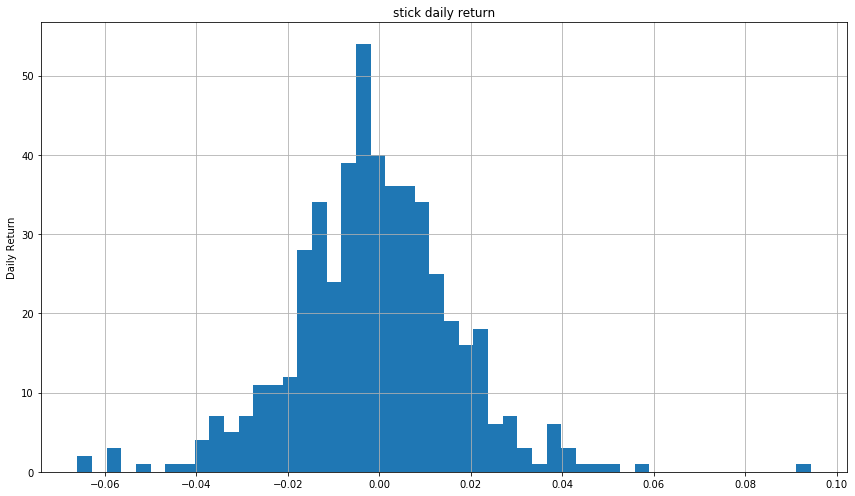

In [9]:
plt.figure(figsize=(12, 7))
KOTAK['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title('stick daily return')
plt.tight_layout()

In [10]:
KOTAK.describe()

,close,VOLUME,No of trades,Daily Return
count,500.000000,5.000000e+02,5.000000e+02,499.000000
mean,2181.372300,1.107555e+07,2.986789e+05,-0.000972
std,278.535489,8.276157e+06,1.606496e+05,0.017921
min,1408.900000,7.871600e+05,6.328500e+04,-0.065968
25%,1991.525000,5.719194e+06,2.059172e+05,-0.011633
50%,2140.975000,8.597469e+06,2.564875e+05,-0.001683
75%,2398.437500,1.384942e+07,3.419685e+05,0.009226
max,2819.850000,6.475177e+07,1.428490e+06,0.094303


### LSTM model

In [11]:
Train_Data = KOTAK['close '].to_numpy()
Data_Train_X = []
Data_Train_Y = []
for i in range(0, len(Train_Data)):
    try:
        Data_Train_Y.append(Train_Data[i : i+5])
    except:
        pass
    
while len(Data_Train_Y[-1]) < 5:
    Data_Train_Y.pop(-1)

Data_Train_Y=Data_Train_Y[: -5 or None]
print(len(Data_Train_Y))

for i in range(5, len(Train_Data)):
    try:
        Data_Train_X.append(Train_Data[i : i+5])
    except:
        pass
    
while len(Data_Train_X[-1]) < 5:
    Data_Train_X.pop(-1)
        
print(len(Data_Train_X))

491
491


In [12]:
def Dataset(Data,train_len,Date):
    Train_Data = Data['close '].to_numpy()
    Data_Train = []
    Data_Train_X = []
    Data_Train_Y = []
    for i in range(0, len(Train_Data)):
        try:
            Data_Train_Y.append(Train_Data[i : i+5])
        except:
            pass
    
    while len(Data_Train_Y[-1]) < 5:
        Data_Train_Y.pop(-1)

    Data_Train_Y=Data_Train_Y[: -5 or None]
    print(len(Data_Train_Y))

    for i in range(5, len(Train_Data)):
        try:
            Data_Train_X.append(Train_Data[i : i+5])
        except:
            pass
    
    while len(Data_Train_X[-1]) < 5:
        Data_Train_X.pop(-1)
        
    print(len(Data_Train_X))
        
  
    #Data_Train_X = Data_Train[0 : -1]
    Data_Train_X = np.array(Data_Train_X) 
    Data_Train_X = np.reshape(Data_Train_X,(Data_Train_X.shape[0],train_len,1))
    #Data_Train_Y = Data_Train[1 : len(Data_Train)]
    Data_Train_Y = np.array(Data_Train_Y)
    Data_Train_Y = Data_Train_Y.reshape(-1, train_len, 1)


    Test_Data = Data['close '][Data['Date '] >= Date].to_numpy()
    Data_Test = []
    Data_Test_X = []
    Data_Test_Y = []
    for i in range(0, len(Test_Data)):
        try:
            Data_Test_Y.append(Test_Data[i : i+5])
        except:
            pass
    
    while len(Data_Test_Y[-1]) < 5:
        Data_Test_Y.pop(-1)

    Data_Test_Y=Data_Test_Y[: -5 or None]
    print(len(Data_Test_Y))

    for i in range(5, len(Test_Data)):
        try:
            Data_Test_X.append(Test_Data[i : i+5])
        except:
            pass
    
    while len(Data_Test_X[-1]) < 5:
        Data_Test_X.pop(-1)
        
    print(len(Data_Test_X))
  
    #Data_Test_X = Data_Test[0 : -1]
    Data_Test_X = np.array(Data_Test_X)
    Data_Test_X = np.reshape(Data_Test_X,(Data_Test_X.shape[0],train_len,1))
    #Data_Test_Y = Data_Test[1 : len(Data_Test)]
    Data_Test_Y = np.array(Data_Test_Y)
    Data_Test_Y = Data_Test_Y.reshape((-1, train_len, 1))

    return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

In [13]:
test_Date = '2022-02-01'
Train_X, Train_Y, Test_X, Test_Y = Dataset(KOTAK, 5, test_Date)

491
491
64
64


In [14]:
print(np.size(Train_X))
print(np.size(Test_X))

2455
320


In [15]:
Test_X

array([[[2399.4 ],
        [2449.3 ],
        [2474.65],
        [2518.3 ],
        [2620.65]],

       [[2449.3 ],
        [2474.65],
        [2518.3 ],
        [2620.65],
        [2640.9 ]],

       [[2474.65],
        [2518.3 ],
        [2620.65],
        [2640.9 ],
        [2693.65]],

       [[2518.3 ],
        [2620.65],
        [2640.9 ],
        [2693.65],
        [2780.45]],

       [[2620.65],
        [2640.9 ],
        [2693.65],
        [2780.45],
        [2790.25]],

       [[2640.9 ],
        [2693.65],
        [2780.45],
        [2790.25],
        [2819.85]],

       [[2693.65],
        [2780.45],
        [2790.25],
        [2819.85],
        [2778.35]],

       [[2780.45],
        [2790.25],
        [2819.85],
        [2778.35],
        [2775.65]],

       [[2790.25],
        [2819.85],
        [2778.35],
        [2775.65],
        [2695.  ]],

       [[2819.85],
        [2778.35],
        [2775.65],
        [2695.  ],
        [2758.8 ]],

       [[2778.35],
        [27

In [16]:
Test_Y

array([[[2479.85],
        [2538.35],
        [2529.15],
        [2427.2 ],
        [2426.6 ]],

       [[2538.35],
        [2529.15],
        [2427.2 ],
        [2426.6 ],
        [2399.4 ]],

       [[2529.15],
        [2427.2 ],
        [2426.6 ],
        [2399.4 ],
        [2449.3 ]],

       [[2427.2 ],
        [2426.6 ],
        [2399.4 ],
        [2449.3 ],
        [2474.65]],

       [[2426.6 ],
        [2399.4 ],
        [2449.3 ],
        [2474.65],
        [2518.3 ]],

       [[2399.4 ],
        [2449.3 ],
        [2474.65],
        [2518.3 ],
        [2620.65]],

       [[2449.3 ],
        [2474.65],
        [2518.3 ],
        [2620.65],
        [2640.9 ]],

       [[2474.65],
        [2518.3 ],
        [2620.65],
        [2640.9 ],
        [2693.65]],

       [[2518.3 ],
        [2620.65],
        [2640.9 ],
        [2693.65],
        [2780.45]],

       [[2620.65],
        [2640.9 ],
        [2693.65],
        [2780.45],
        [2790.25]],

       [[2640.9 ],
        [26

### model

In [17]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [18]:
def Model():
    model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
    return model

In [19]:
model = Model()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 200)            161600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 200)               40200     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 255       
Total params: 548,005
Trainable params: 548,005
Non-trainable params: 0
__________________________________________________

In [21]:
def scheduler(epoch):
    if epoch <= 150:
        lrate = (10 ** -5) * (epoch / 150) 
    elif epoch <= 400:
        initial_lrate = (10 ** -5)
        k = 0.01
        lrate = initial_lrate * math.exp(-k * (epoch - 150))
    else:
        lrate = (10 ** -6)
  
    return lrate

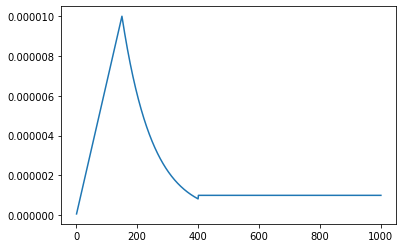

In [22]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [23]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [24]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [25]:
AAPL_hist = model.fit(Train_X, Train_Y, epochs = 1000, validation_data = (Test_X, Test_Y), callbacks=[callback])

Epoch 1/1000
16/16 [==============================] - 0s 30ms/step - loss: 4837189.5000 - root_mean_squared_error: 2199.3611 - val_loss: 6329620.0000 - val_root_mean_squared_error: 2515.8735
Epoch 2/1000
16/16 [==============================] - 0s 15ms/step - loss: 4837048.0000 - root_mean_squared_error: 2199.3291 - val_loss: 6329189.0000 - val_root_mean_squared_error: 2515.7881
Epoch 3/1000
16/16 [==============================] - 0s 15ms/step - loss: 4836601.0000 - root_mean_squared_error: 2199.2273 - val_loss: 6328311.0000 - val_root_mean_squared_error: 2515.6135
Epoch 4/1000
16/16 [==============================] - 0s 15ms/step - loss: 4835827.0000 - root_mean_squared_error: 2199.0515 - val_loss: 6327023.0000 - val_root_mean_squared_error: 2515.3574
Epoch 5/1000
16/16 [==============================] - 0s 15ms/step - loss: 4834766.0000 - root_mean_squared_error: 2198.8103 - val_loss: 6325396.0000 - val_root_mean_squared_error: 2515.0337
Epoch 6/1000
16/16 [=========================

In [26]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

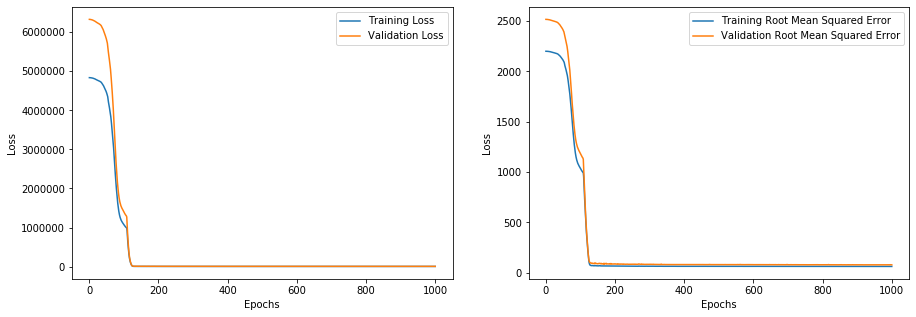

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [28]:
predictions = model.predict(Test_X)

In [29]:
predictions.shape

(64, 5)

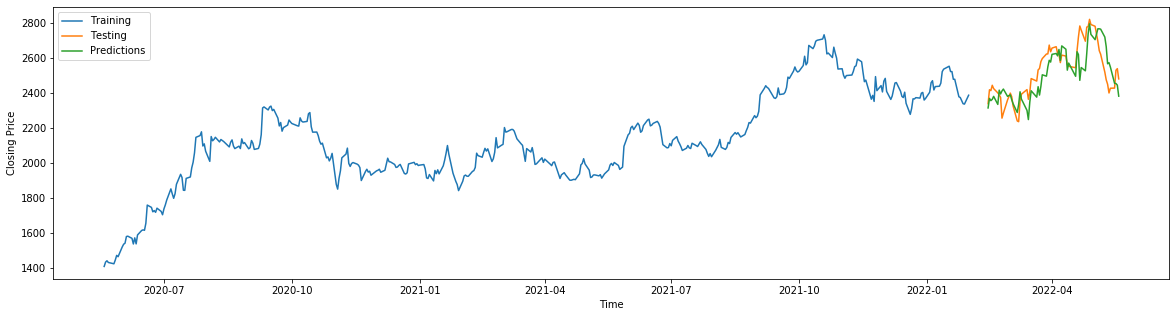

In [30]:
plt.figure(figsize=(20, 5))
plt.plot(KOTAK['Date '][KOTAK['Date '] < '2022-02-01'], KOTAK['close '][KOTAK['Date '] < '2022-02-01'], label = 'Training')
plt.plot(KOTAK['Date '][KOTAK['Date '] >= '2022-02-12'],Test_Y[:,0], label = 'Testing')
plt.plot(KOTAK['Date '][KOTAK['Date '] >= '2022-02-12'], predictions[:,0], label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

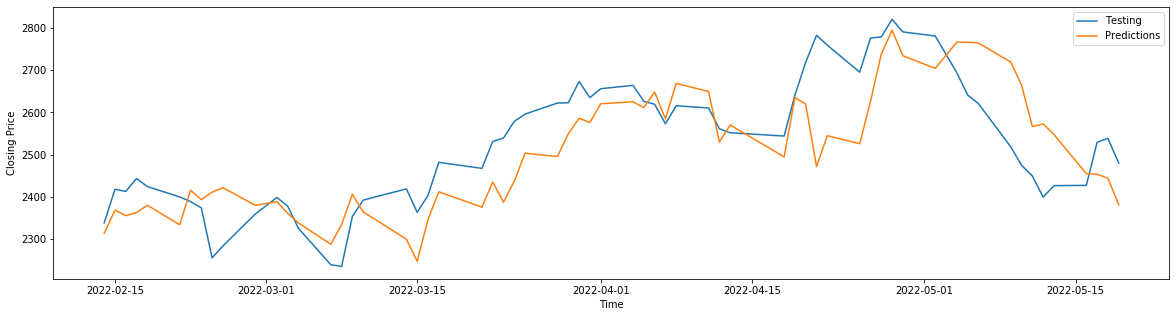

In [31]:
plt.figure(figsize=(20, 5))
#plt.plot(KOTAK['Date '][KOTAK['Date '] < '2022-02-01'], KOTAK['close '][KOTAK['Date '] < '2022-02-01'], label = 'Training')
plt.plot(KOTAK['Date '][KOTAK['Date '] >= '2022-02-12'], Test_Y[:,0], label = 'Testing')
plt.plot(KOTAK['Date '][KOTAK['Date '] >= '2022-02-12'], predictions[:,0], label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [50]:
# get last 5 day price and feed model to get next 5 day price
x = np.array([np.array([[2624.45],
                        [2479.85],
                       [2538.35],
                       [2529.15],
                       [2427.20]])])

In [51]:
x.ndim

3

In [52]:
prediction = model.predict(x)

In [53]:
prediction[0]

array([2551.396 , 2584.3276, 2545.7476, 2588.7214, 2635.833 ],
      dtype=float32)

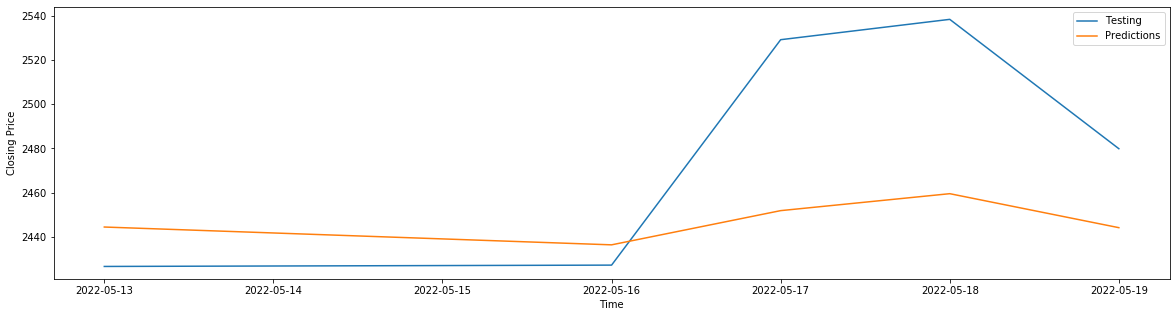

In [36]:
plt.figure(figsize=(20, 5))
#plt.plot(KOTAK['Date '][KOTAK['Date '] < '2022-02-01'], KOTAK['close '][KOTAK['Date '] < '2022-02-01'], label = 'Training')
plt.plot(KOTAK['Date '][KOTAK['Date '] >= '2022-05-13'], KOTAK['close '][KOTAK['Date '] >= '2022-05-13'], label = 'Testing')
plt.plot(KOTAK['Date '][KOTAK['Date '] >= '2022-05-13'], predictions[1], label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [37]:
t1 = pd.DataFrame([[i] for i in predictions],columns = ["Predicted"])
t2 = pd.DataFrame([[np.reshape(i,(5))] for i in Test_X],columns = ["Test_X"])
t3 = pd.DataFrame([[np.reshape(i,(5))] for i in Test_Y],columns = ["Test_Y"])
t4 = pd.DataFrame([i[4] for i in Test_Y],columns = ["close"])

In [38]:
t = pd.concat([t1,t2,t3,t4],axis=1)

In [42]:
t

,Predicted,Test_X,Test_Y,close
0,"[2381.2825, 2408.5417, 2394.9463, 2373.8755, 2...","[2399.4, 2449.3, 2474.65, 2518.3, 2620.65]","[2479.85, 2538.35, 2529.15, 2427.2, 2426.6]",2426.60
1,"[2444.136, 2459.508, 2451.8428, 2436.3713, 244...","[2449.3, 2474.65, 2518.3, 2620.65, 2640.9]","[2538.35, 2529.15, 2427.2, 2426.6, 2399.4]",2399.40
2,"[2453.4297, 2475.742, 2476.9304, 2459.6548, 24...","[2474.65, 2518.3, 2620.65, 2640.9, 2693.65]","[2529.15, 2427.2, 2426.6, 2399.4, 2449.3]",2449.30
3,"[2454.9248, 2468.6436, 2453.9138, 2441.2095, 2...","[2518.3, 2620.65, 2640.9, 2693.65, 2780.45]","[2427.2, 2426.6, 2399.4, 2449.3, 2474.65]",2474.65
4,"[2547.5352, 2557.3093, 2593.6116, 2591.3018, 2...","[2620.65, 2640.9, 2693.65, 2780.45, 2790.25]","[2426.6, 2399.4, 2449.3, 2474.65, 2518.3]",2518.30
...,...,...,...,...
59,"[2380.112, 2380.9219, 2385.1572, 2361.5344, 23...","[2376.4, 2381.05, 2383.5, 2356.05, 2317.1]","[2424.4, 2443.5, 2412.95, 2417.95, 2338.55]",2338.55
60,"[2363.023, 2369.5908, 2370.477, 2361.7383, 235...","[2381.05, 2383.5, 2356.05, 2317.1, 2331.3]","[2443.5, 2412.95, 2417.95, 2338.55, 2376.4]",2376.40
61,"[2355.5989, 2356.545, 2350.8147, 2372.5786, 23...","[2383.5, 2356.05, 2317.1, 2331.3, 2352.75]","[2412.95, 2417.95, 2338.55, 2376.4, 2381.05]",2381.05
62,"[2368.648, 2358.3667, 2349.5657, 2368.7, 2363....","[2356.05, 2317.1, 2331.3, 2352.75, 2383.55]","[2417.95, 2338.55, 2376.4, 2381.05, 2383.5]",2383.50


In [47]:
np.sum(t['Predicted'][0])
t5 = pd.DataFrame([np.sum(t['Predicted'][i])/5.0 for i in range(64)],columns = ["avg pred"])
t6 = pd.DataFrame([np.sum(t['Test_X'][i])/5.0 for i in range(64)],columns = ["avg x"])

In [48]:
t = pd.concat([t,t5,t6],axis=1)

In [49]:
t.to_csv('result.csv')

### model 2

In [87]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import numpy as np

def lstm_model(df,l = 60,n_units = 50):
    df['Date '] = pd.to_datetime(df['Date '],format='%Y-%m-%d')
    df.index = df['Date ']
    
    data = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date ', 'close '])
    
    for i in range(0,len(data)):
        new_data['Date '][i] = data['Date '][i]
        new_data['close '][i] = data['close '][i]
        
    new_data.index = new_data['Date ']
    new_data.drop('Date ', axis=1, inplace=True)
    
    dataset = new_data.values
    
    n = int(new_data.size*0.8)
    
    train = dataset[0:n,:]
    valid = dataset[n:,:]

    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    #length of sequence (l) 
    
    x_train, y_train = [], []
    for i in range(l,len(train)):
        x_train.append(scaled_data[i-l:i,0])
        y_train.append(scaled_data[i:i+10,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    model = Sequential()
    model.add(LSTM(units=n_units, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=n_units))
    model.add(Dense(10))
    print(model.summary())
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1)
    
    inputs = new_data[len(new_data) - len(valid) - l:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    
    X_test = []
    for i in range(l,inputs.shape[0]):
        X_test.append(inputs[i-l:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    print('rms = '+str(np.sqrt(np.mean(np.power((valid-closing_price),2)))))
    
    train = new_data[:n]
    valid = new_data[n:]
    valid['Predictions'] = closing_price[:,0]
    plt.figure(figsize=(10,7))
    plt.plot(train['close '])
    plt.plot(valid[['close ','Predictions']]) 
    plt.show()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dense_26 (Dense)            (None, 10)                510       
                                                                 
Total params: 31,110
Trainable params: 31,110
Non-trainable params: 0
_________________________________________________________________
None
337/337 [==============================] - 6s 13ms/step - loss: 0.0182
rms = 77.49208569698813
[[0.03609765 0.05868835 0.04525366 0.03848054 0.051623   0.04758705
  0.04802215 0.05642658 0.05269763 0.06064392]
 [0.03534399 0.05757557 0.0441385  0.03763264 0.0508312  0.04670704
  0.04763145 0.05574267 0.0520

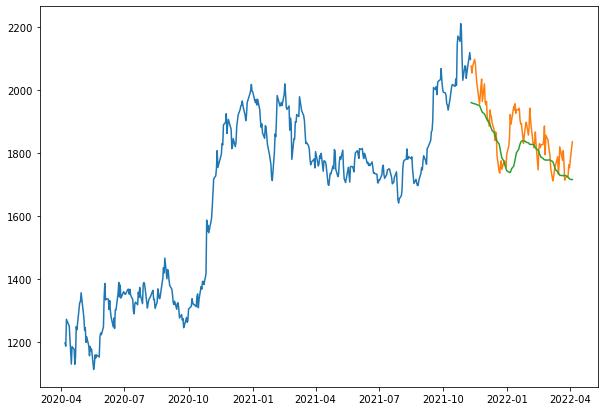

In [88]:
lstm_model(KOTAK,l = 60,n_units = 50)